<a href="https://colab.research.google.com/github/sumitlodha1/APS-Lab/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **selection sort**.
- ** -Algorithm
* Step 1: Read the number of elements for the list from the user.
* Step 2: Using for loop insert the elements in the list.
* Step 3: Initialize the minimum element as min=numbers[i].
* Step 4: Using the swap method the elements are sorted accordingly.
* Step 5: Print the sorted list.

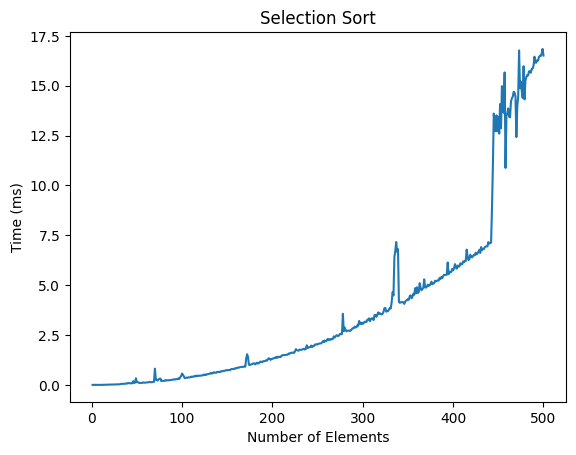

In [74]:
#write code for above cell and compute the running time and also plot graph.
import matplotlib.pyplot as plt
import copy
import random
import numpy as np
from datetime import datetime
import timeit

def selection_sort(data):
  n = len(data)
  for i in range(n):
    min = data[i]
    for j in range(i+1, n):
      if min>data[j]:
        data[j], data[i] = data[i], data[j]

numLen = list(range(1, 501))
t = []
for val in numLen:
  numVals = []
  for i in range(val):
      numVals.append(int(random.random() * 1000))

  st = timeit.default_timer()
  selection_sort(numVals)
  t.append((timeit.default_timer() - st) * 1000)


plt.figure()
plt.plot(numLen, t)
plt.xlabel("Number of Elements")
plt.ylabel("Time (ms)")
plt.title("Selection Sort")
plt.show()


In computer science, **merge sort** (also commonly spelled mergesort) is an efficient, general-purpose, comparison-based sorting algorithm. Most implementations produce a stable sort, which means that the order of equal elements is the same in the input and output. Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945.
Write a Python program to sort the elements using **merge sort** and plot a graph to the time taken versus n
- Algorithm(Merge Sort is a divide and conquer algorithm. It divides	input array in two halve.s, calls itself for the two halves and then merges two sorted halves.)
1.	Divide the unsorted array into n partitions, each	partition contains 1 element.
2.	Repeatedly merge partitioned units to produce	new sublists until there is only l sublist remaining. This will be the sorted	.
3.	Compare the first element of the sublist with the first element of the sublist to its right.
4.	Merge the two sublists by	paring each element of the sublist and placing the smaller element into the	new sublist.
5.	Repeat step 3 and 4 untill	all sublists are merged into a single sorted sublist.



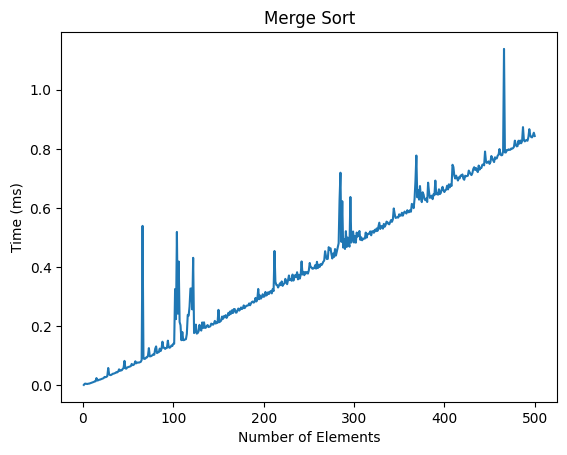

In [75]:
#write code for above cell and compute the running time and also plot graph.

def merge(data, lp, rp):
  i=j=k=0

  while i<len(lp) and j<len(rp):
    if lp[i]<rp[j]:
      data[k] = lp[i]
      k+=1
      i+=1
    else:
      data[k] = rp[j]
      k+=1
      j+=1

  while i<len(lp):
    data[k] = lp[i]
    i+=1
    k+=1
  while j<len(rp):
    data[k] = rp[j]
    j+=1
    k+=1

def merge_sort(data):
  if len(data)>1:
    mid = int(len(data)/2)
    lp = data[:mid]
    rp = data[mid:]
    merge_sort(lp)
    merge_sort(rp)

    merge(data , lp, rp)

tMerge = []
for val in numLen:
  numVals = []
  for i in range(val):
      numVals.append(int(random.random() * 1000))

  st = timeit.default_timer()
  merge_sort(numVals)
  tMerge.append((timeit.default_timer() - st) * 1000)


plt.figure()
plt.plot(numLen, tMerge)
plt.xlabel("Number of Elements")
plt.ylabel("Time (ms)")
plt.title("Merge Sort")
plt.show()



**Quicksort** (sometimes called partition-exchange sort) is an efficient sorting algorithm. Developed by British computer scientist Tony Hoare in 1959 and published in 1961, it is still a commonly used algorithm for sorting.

Quicksort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This can be done in-place, requiring small additional amounts of memory to perform the sorting.
Write a Python program to sort the elements using quick sort and plot a graph to the time taken versus n.
- Algorithm
1.	Select a pivot element from the array.
2.	Partition the array into two sub-arrays. The elements in the first sub-array are less than the pivot element, while the elements in the second sub-array are greater than the pivot element.
3.	Recursively sort the sub-arrays created in Step 2.
4.	Join the sub-arrays and the pivot element together to	the sorted array.


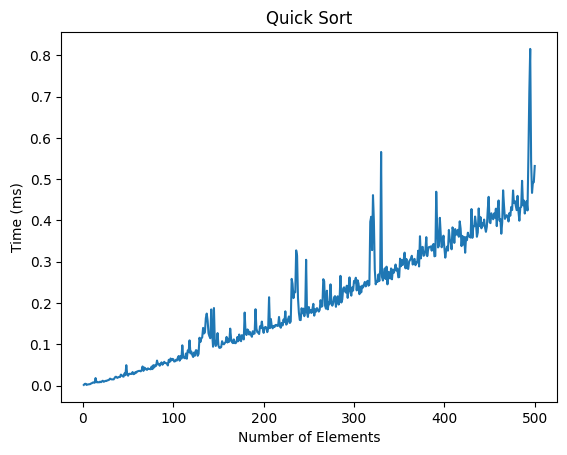

In [76]:
#write code for above cell and compute the running time and also plot graph.

def partiton(data, l, r):
  pivot = data[r]
  idx = l-1
  for i in range(l, r):
    if data[i]<=pivot:
      idx+=1
      data[idx], data[i] = data[i], data[idx]

  data[idx+1], data[r] = data[r], data[idx+1]
  return idx+1

def quick_sort(data, low, high):

  if low<high:
    part = partiton(data, low, high)

    quick_sort(data, low, part-1)
    quick_sort(data, part+1, high)

tQuick = []
for val in numLen:
  numVals = []
  for i in range(val):
      numVals.append(int(random.random() * 1000))

  st = timeit.default_timer()
  quick_sort(numVals, 0, val-1)
  tQuick.append((timeit.default_timer() - st) * 1000)

plt.figure()
plt.plot(numLen, tQuick)
plt.xlabel("Number of Elements")
plt.ylabel("Time (ms)")
plt.title("Quick Sort")
plt.show()


### Experiment: compare sorting algorithms

In [77]:
# Experiment variables
n_list = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000]
n_max = n_list[len(n_list) -1]

In [78]:
# Creating a random value (uniform)
ms = datetime.now().microsecond / 1000
random.seed(ms)

numbers = []
for i in range(n_max):
    numbers.append(int(random.random() * 1000))

In [79]:
a_time = []
b_time = []
c_time = []

for l in n_list:
    a = copy.deepcopy(numbers[0:l])
    b = copy.deepcopy(numbers[0:l])
    c = copy.deepcopy(numbers[0:l])

    start_time = timeit.default_timer()
    quick_sort(a, 0, l-1)
    a_time.append((timeit.default_timer() - start_time) * 1000)

    start_time = timeit.default_timer()
    merge_sort(b)
    b_time.append((timeit.default_timer() - start_time) * 1000)

    start_time = timeit.default_timer()
    selection_sort(c)
    c_time.append((timeit.default_timer() - start_time) * 1000)

KeyboardInterrupt: 

In [ ]:
# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(a_time, linewidth = 1, marker="o")
plt.plot(b_time, linewidth = 1, marker="o")
plt.plot(c_time, linewidth = 1, marker="o")
plt.xticks(np.arange(len(n_list)), n_list)
plt.title("Compare Sorting Algorithms", fontsize = 14)
plt.ylabel('Time (ms)')
plt.xlabel('n')
plt.legend(("Quicksort", "Mergesort", "Selection sort"), loc = "best")
plt.show()